# Exploratory data Analysis

## Introduction 
After pre-processing the data available and going through some basic cleaning we are looking at a cleaned CSV data file that contains 5265 rows and 33 columns. All these records contain a Skin symptoms value. Throughout this EDA we will dive deeper to understand underlying connections and correlations amongs dogs with skin conditions in order to identify key reasons (environmental, breed related, genetic, etc.) that could potentially provide a solid foundation for our model to predict a positice or negative skin condition diagnosis. 

Environment_Skin df guide:
- Skin Symptoms
    - 1=No, 2=Yes
- Season Born
    - 1=Winter, 2=Spring, 3=Summer, 4=Fall
- Heating System
    - 1=Wood, 2=Other
- House now
    - 1=Apartment, 2=Row, 3=Detached wood, 4=Detached not wood
- House before
    - 1=Apartment, 2=Row, 3=Detached wood, 4=Detached not wood
- Clean house
    - 1=Extremely clean, 2=Other
- Puppy Dewormed
    - 0=No, 1=Yes
- Puppy Vaccinated
    - 0=No, 1=Yes
- Dam Dewarmed Prebirth
    - 0=No, 1=Yes
- Dam Vaccinated Prebirth
    - 0=No, 1=Yes
- Gender
    - 1=Male, 2=Female
- Over 50% white
    - 1=Yes, 2=No
- Other Animals
    - 1=No, 2=Yes
- Other Dogs
    - 1=No, 2=Yes
- Born in Owner Family
    - 1=No, 2=Yes
- Smoking Previously
    - 1=Mainly inside, 2=Rarely inside, 3=Only outside
- Does the Dog have a Yard
    - 1=No, 2=Loose in a yard, 3=Loose in a kennel, 4=Chained in a yard
- BCS under 2 mo
    - 1=Normal, 2=Obese, 3=Fat, 4=Slim, 5=Very slim
- Outside Under 2 mo
    - 1=Several times a day, 2=Once a day, 3=Several times a week, 4=Several times a month, 5=Not at all
- Outside Under 5 mo
    - 1=Under 30 min, 2=30-60 min, 3=1-2 h, 4=Over 2h
- Skin Symptoms Dam
    - 1=No, 2=Yes
- Vet Diagnosis
    - 0=No, 1=Yes

### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
# Load cleaned and merged df
df = pd.read_csv("../Data/df_cleaned.csv")

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,Skin symptoms,Season born,Heating system_house,House _now,House_before,Clean_house,Puppy_dewormed,Puppy_vaccinated,Dam_dewormed_prebirth,Dam_vaccinated_prebirth,...,Breed_En,Classification,Obey,Reps_lower,Reps_upper,Height_low_inches,Height_high_inches,Weight_low_lbs,Weight_high_lbs,Category
0,1,1.0,1.0,NaN,NaN,2.0,1.0,1.0,NaN,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding
1,1,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding
2,1,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding
3,1,1.0,2.0,4.0,NaN,2.0,1.0,1.0,1.0,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding
4,1,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding


In [5]:
df.shape

(5265, 33)

In [6]:
df['Classification'] = df.Classification.astype('str')

In [7]:
df['Category'] = df.Category.astype('str')

In [8]:
df['Breed_En'] = df.Breed_En.astype('str')

In [9]:
df['Breed_En'].value_counts()

multiracial            699
German shepherd        392
Labrador Retriever     199
Rottweiler             150
Finnish Lapphund       136
                      ... 
Bergamasco shepherd      1
Catalonia Shepherd       1
Estonian Hound           1
Lakeland Terrier         1
Italian Hound            1
Name: Breed_En, Length: 202, dtype: int64

# Explore the data 

### Missing values 

In [10]:
# Missing value counts
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis= 1)
missing.columns=["count", "%" ]
missing.sort_values(by=['count', '%'], ascending=False)

,count,%
Obey,2890,54.890788
Reps_lower,2787,52.934473
Reps_upper,2787,52.934473
Height_low_inches,2787,52.934473
Height_high_inches,2787,52.934473
Weight_low_lbs,2787,52.934473
Weight_high_lbs,2787,52.934473
Skin symptoms_dam,2699,51.263058
Smoking_previously,2560,48.622982
Dam_dewormed_prebirth,1741,33.067426


In [11]:
# remove % and nulls from obey 
def replace_obey(x):
    try:
        return int(x.replace('%', ''))
    except:
        return None
df['Obey'] = df['Obey'].apply(replace_obey)

In [12]:
df.shape

(5265, 33)

## Analysing possible relations in columns where dam (pup's mom) is connected to Skin Symtpoms (genetic issue)

In [13]:
#Vet diagnosis null = 741 Skin symptoms null = 0 
print(df['Vet diagnosis'].value_counts())
print(df['Skin symptoms'].value_counts())

0.0    4332
1.0     192
Name: Vet diagnosis, dtype: int64
1    4332
2     933
Name: Skin symptoms, dtype: int64


### Skin Symptoms Dam

In [14]:
#0=No 1=Yes
df['Skin symptoms_dam'].value_counts()

1.0    2457
2.0     109
Name: Skin symptoms_dam, dtype: int64

In [15]:
# Puppies with skin symptoms based on: 
ssd =df.groupby(['Skin symptoms_dam', 'Skin symptoms'])['Skin symptoms'].sum().rename("trial").groupby(level = 0).transform(lambda x: x/x.sum())
ssd

Skin symptoms_dam  Skin symptoms
1.0                1                0.779790
                   2                0.220210
2.0                1                0.345679
                   2                0.654321
Name: trial, dtype: float64

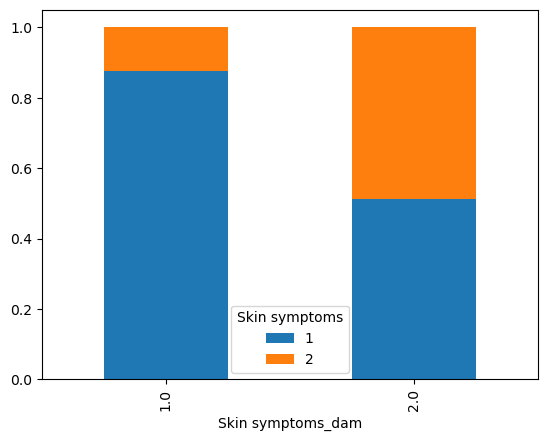

In [16]:
#Visual representation  
(pd.crosstab(df['Skin symptoms_dam'],df['Skin symptoms'], 
             normalize='index')
   .plot.bar(stacked=True)
)
plt.show()

We can see in the graph that almost 3x the number of puppies of dams with skin symptoms also present skin symptoms. This could mean the condition can be hereditary. 

### Dam Dewormend Prebirth 

In [17]:
#0=No, 1=Yes
df['Dam_dewormed_prebirth'].value_counts()

1.0    3383
0.0     141
Name: Dam_dewormed_prebirth, dtype: int64

In [18]:
# Puppies with skin symptoms based on: 
ddp =df.groupby(['Dam_dewormed_prebirth', 'Skin symptoms'])['Skin symptoms'].sum().rename("trial").groupby(level = 0).transform(lambda x: x/x.sum())
ddp

Dam_dewormed_prebirth  Skin symptoms
0.0                    1                0.678571
                       2                0.321429
1.0                    1                0.722944
                       2                0.277056
Name: trial, dtype: float64

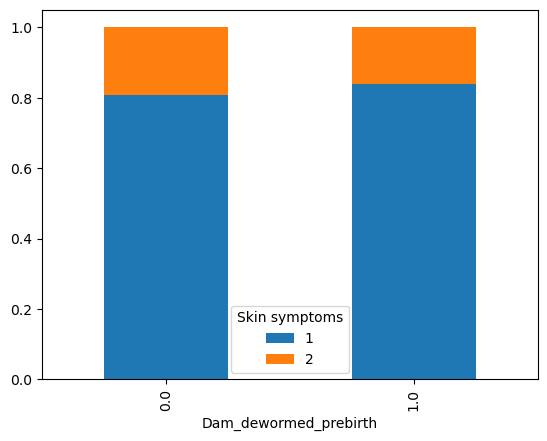

In [19]:
#Visual representation  
(pd.crosstab(df['Dam_dewormed_prebirth'],df['Skin symptoms'], 
             normalize='index')
   .plot.bar(stacked=True)
)
plt.show()

There does not seem to be a significant impact on the puppy's skin symptoms if the dam is dewormed before birth. There is only a roughly 4% decrease in cases.

### Dam Vaccinated Prebirth 

In [20]:
#1=No 2=Yes
df['Dam_vaccinated_prebirth'].value_counts()

1    2673
0    2592
Name: Dam_vaccinated_prebirth, dtype: int64

In [21]:
# Puppies with skin symptoms based on: 
dvp =df.groupby(['Dam_vaccinated_prebirth', 'Skin symptoms'])['Skin symptoms'].sum().rename("trial").groupby(level = 0).transform(lambda x: x/x.sum())
dvp 

Dam_vaccinated_prebirth  Skin symptoms
0                        1                0.698558
                         2                0.301442
1                        1                0.699301
                         2                0.300699
Name: trial, dtype: float64

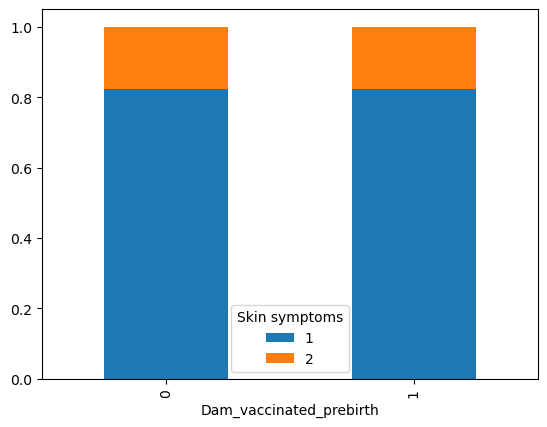

In [22]:
#Visual representation  
(pd.crosstab(df['Dam_vaccinated_prebirth'],df['Skin symptoms'], 
             normalize='index')
   .plot.bar(stacked=True)
)
plt.show()

The percentage of puppy's skin condition are virtually equal regardless of the dam's vaccination prebirth. 

## Visualizing other variables 

In [23]:
#Characteristics of pup and skin condition presented
p1= pd.crosstab(df["Bcs_under 2 mo"], df['Skin symptoms'], normalize='index')
p2= pd.crosstab(df["Puppy_dewormed"], df['Skin symptoms'], normalize='index')
p3= pd.crosstab(df["Puppy_vaccinated"], df['Skin symptoms'], normalize='index')
p4= pd.crosstab(df["Over 50% white"], df['Skin symptoms'], normalize='index')
p5= pd.crosstab(df["Born in owner family"], df['Skin symptoms'], normalize='index')
p6= pd.crosstab(df["Gender"], df['Skin symptoms'], normalize='index')

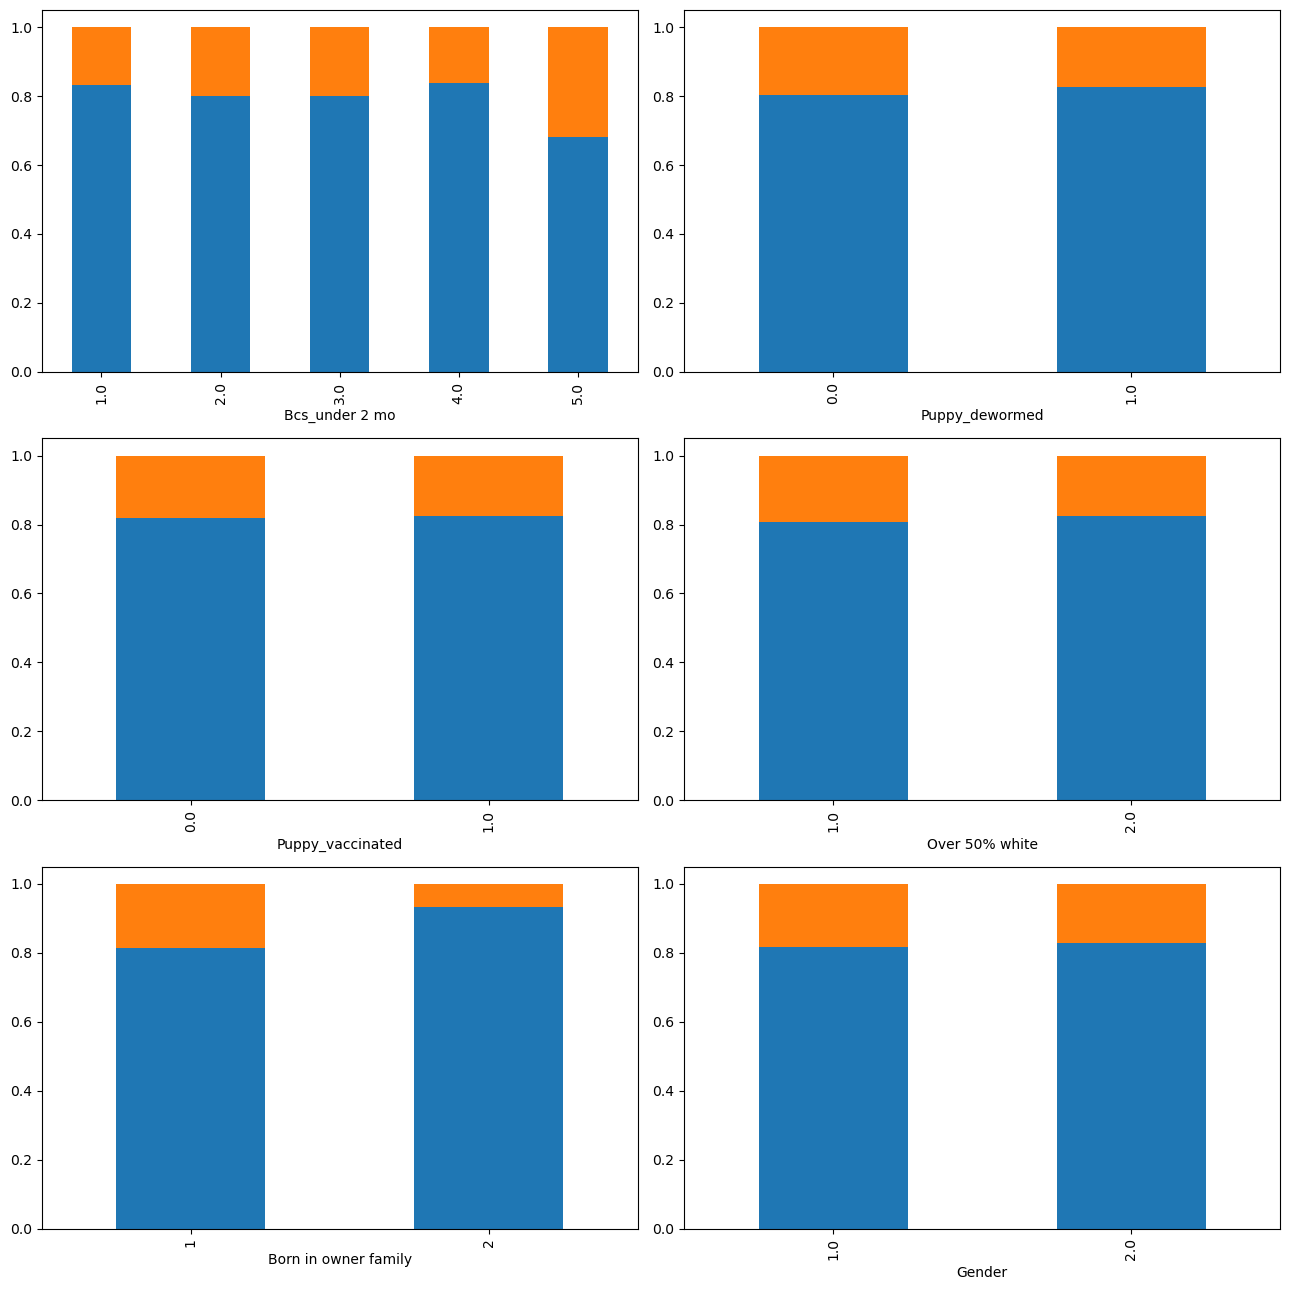

In [24]:
nrow=3
ncol=2
df_list = [p1 ,p2, p3, p4, p5, p6]
fig, axes = plt.subplots(nrow, ncol)

count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot.bar(ax=axes[r,c], stacked=True, legend=False, figsize=(13, 13))
        count+=1

plt.tight_layout()

In [25]:
# BCS percentage breakdown: 
bcs =df.groupby(['Bcs_under 2 mo', 'Skin symptoms'])['Skin symptoms'].sum().rename("trial").groupby(level = 0).transform(lambda x: x/x.sum())
bcs 

Bcs_under 2 mo  Skin symptoms
1.0             1                0.714851
                2                0.285149
2.0             1                0.666667
                2                0.333333
3.0             1                0.665706
                2                0.334294
4.0             1                0.722922
                2                0.277078
5.0             1                0.516129
                2                0.483871
Name: trial, dtype: float64

In [26]:
# Born in owner family precentage breakdown: 
bof =df.groupby(['Born in owner family', 'Skin symptoms'])['Skin symptoms'].sum().rename("trial").groupby(level = 0).transform(lambda x: x/x.sum())
bof 

Born in owner family  Skin symptoms
1                     1                0.684707
                      2                0.315293
2                     1                0.872340
                      2                0.127660
Name: trial, dtype: float64

Puppy being dewormed or vaccinated does not seem to show any relation to them representing skin symptoms. likewise, being over 50% white or the puppy's gender also do not seem to be related. 
Checking on the two features that show some variability we find that:
Skin condition based on the puppy's BCS (body condition score) remains steady within the first 4 but has a 25.7% increase when the puppy has a 5 BCS which refers to "Very Slim". 
Skin condition based on being born in the owner's family show that when the pup is not born in owner's family, they show an 18.7% more cases of skin condition than if they are born in the family.

In [27]:
#Outside Environment
p1= pd.crosstab(df["Smoking_previously"], df['Skin symptoms'], normalize='index')
p2= pd.crosstab(df["Does the dog have a yard"], df['Skin symptoms'], normalize='index')
p3= pd.crosstab(df["Outside_under 2 mo"], df['Skin symptoms'], normalize='index')
p4= pd.crosstab(df["Season born"], df['Skin symptoms'], normalize='index')
p5= pd.crosstab(df["Outside a day_under 5mo"], df['Skin symptoms'], normalize='index')
p6= pd.crosstab(df["Category"], df['Skin symptoms'], normalize='index')

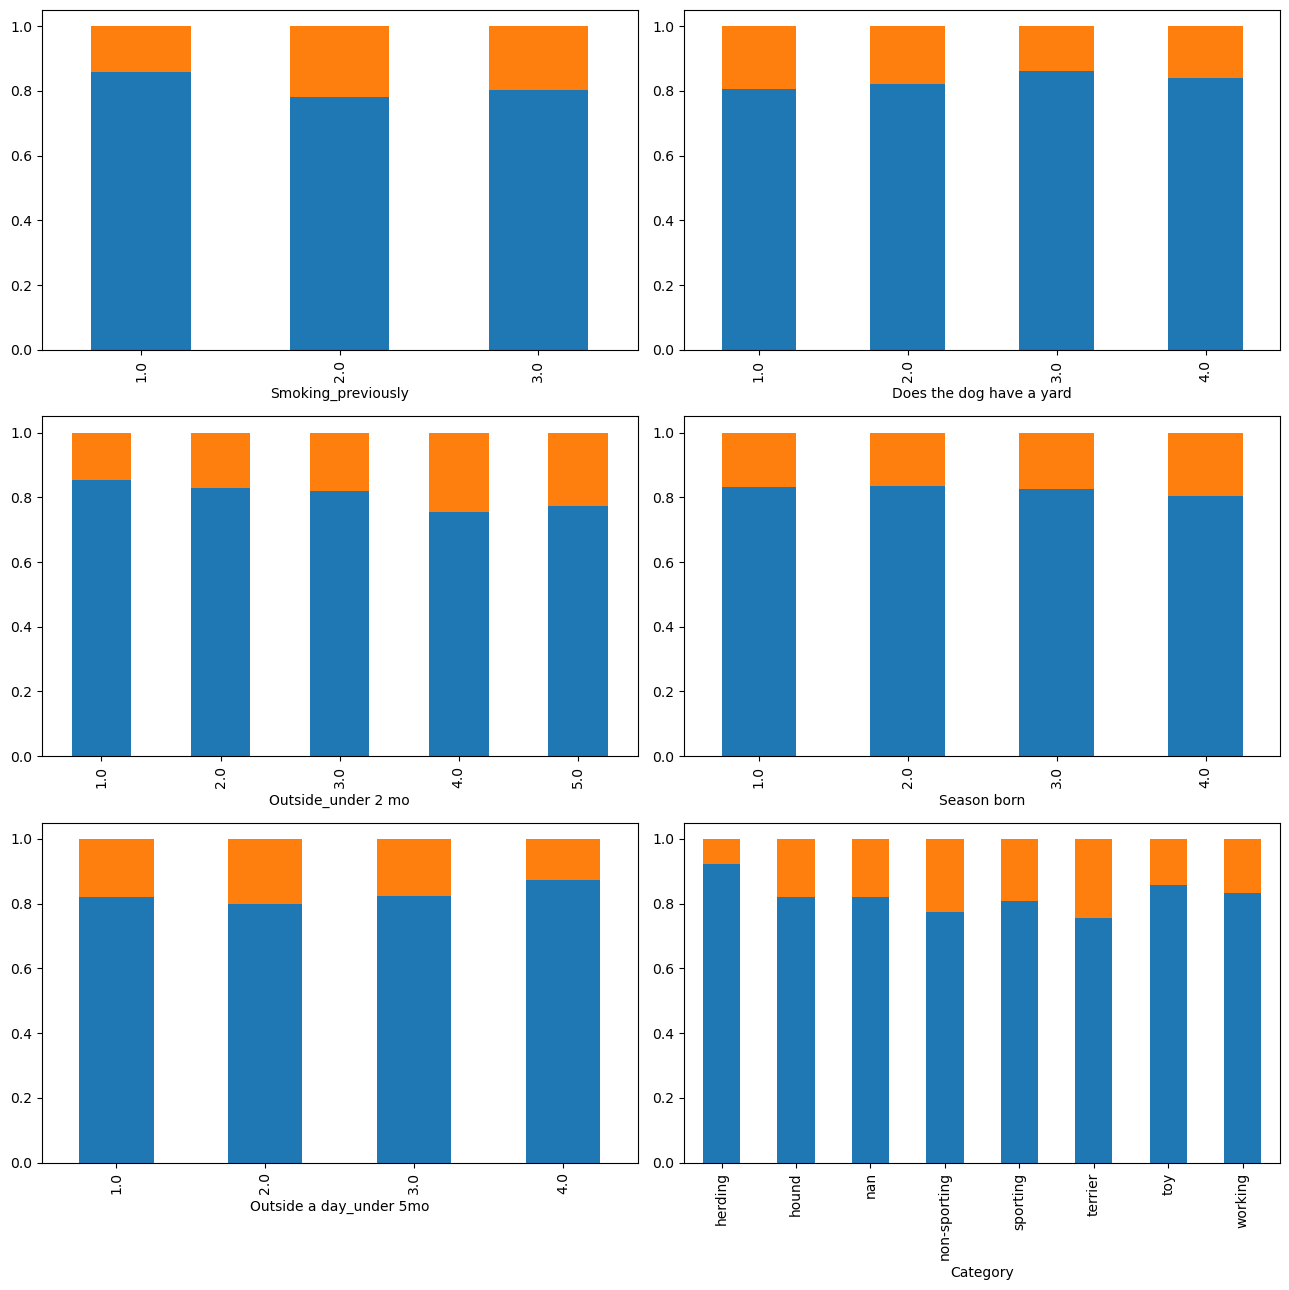

In [28]:
nrow=3
ncol=2
df_list = [p1 ,p2, p3, p4, p5, p6]
fig, axes = plt.subplots(nrow, ncol)

count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot.bar(ax=axes[r,c], stacked=True, legend=False, figsize=(13, 13))
        count+=1

plt.tight_layout()

There is very small variability in most of the characteristics here. We will dive more into Category later on. 

In [29]:
#House Environment
#Outside Environment
p1= pd.crosstab(df["Heating system_house"], df['Skin symptoms'], normalize='index')
p2= pd.crosstab(df["House _now"], df['Skin symptoms'], normalize='index')
p3= pd.crosstab(df["House_before"], df['Skin symptoms'], normalize='index')
p4= pd.crosstab(df["Clean_house"], df['Skin symptoms'], normalize='index')
p5= pd.crosstab(df["Other animals"], df['Skin symptoms'], normalize='index')
p6= pd.crosstab(df["Other dogs"], df['Skin symptoms'], normalize='index')

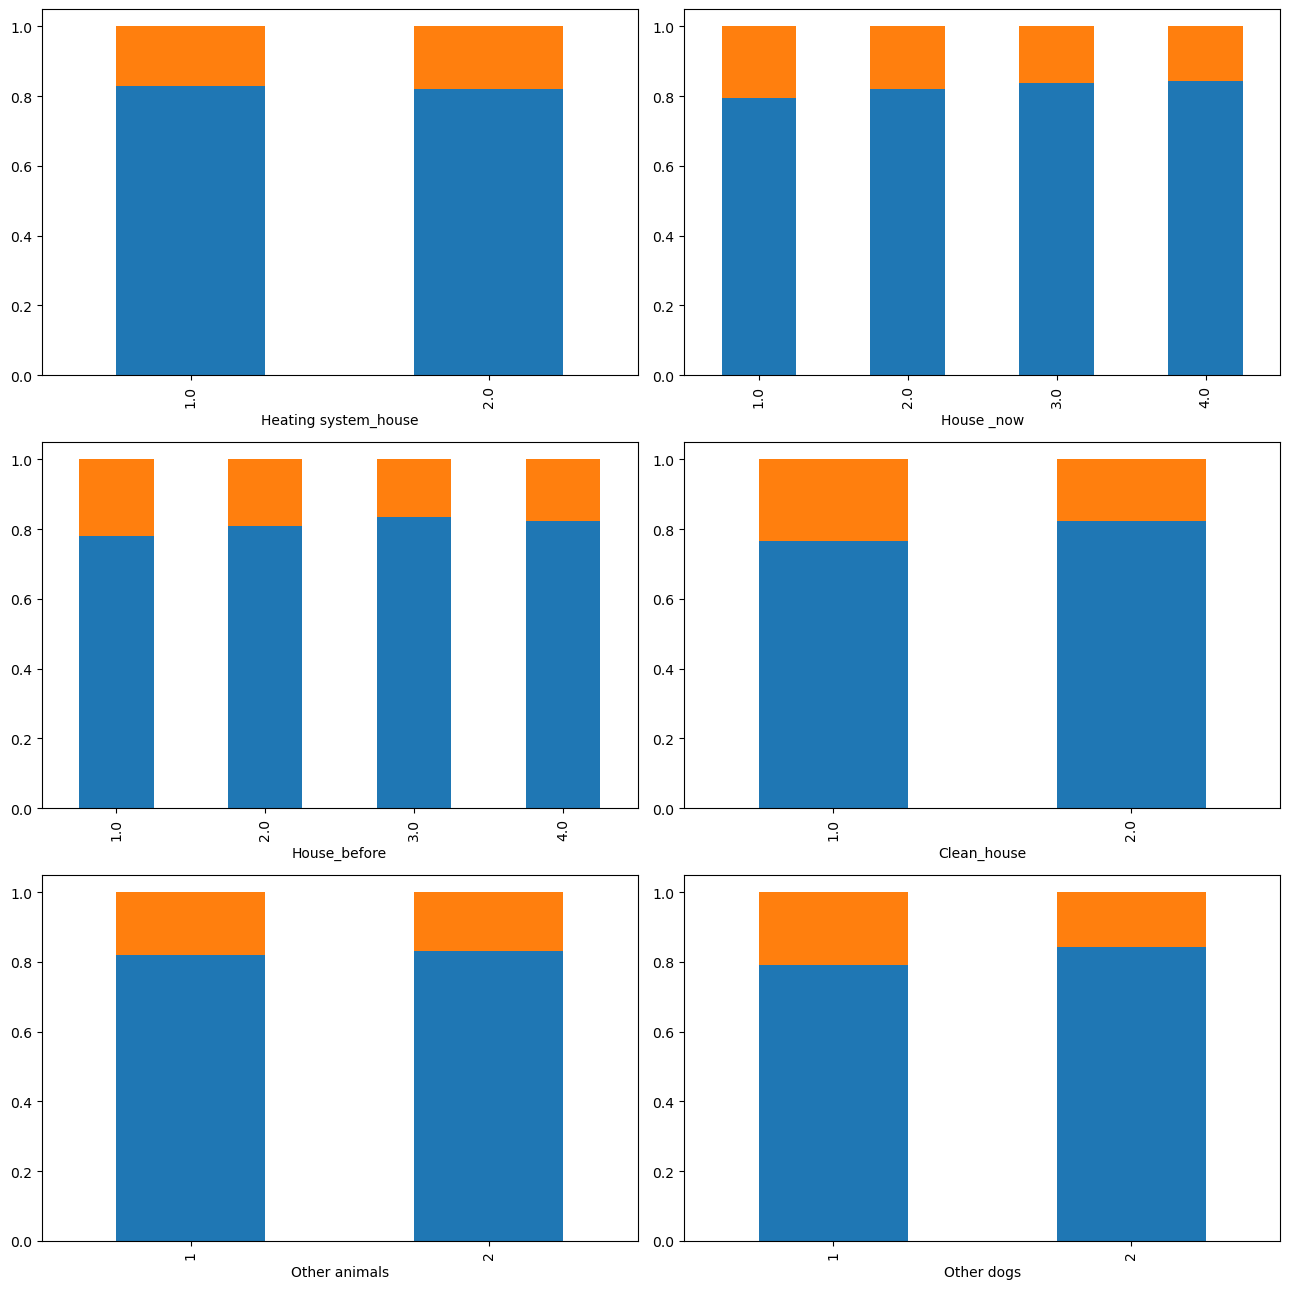

In [30]:
nrow=3
ncol=2
df_list = [p1 ,p2, p3, p4, p5, p6]
fig, axes = plt.subplots(nrow, ncol)

count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot.bar(ax=axes[r,c], stacked=True, legend=False, figsize=(13, 13))
        count+=1

plt.tight_layout()

Like the analysis before, there is very small variability between the different house environmet characteristics and their relation to a pup's skin condition. 

In [31]:
# Puppies with skin symptoms based on category, diving deeper from previous graph analysis
cat =df.groupby(['Category', 'Skin symptoms'])['Skin symptoms'].sum().rename("trial").groupby(level = 0).transform(lambda x: x/x.sum())
cat

Category      Skin symptoms
herding       1                0.858462
              2                0.141538
hound         1                0.696751
              2                0.303249
nan           1                0.696804
              2                0.303196
non-sporting  1                0.632353
              2                0.367647
sporting      1                0.676101
              2                0.323899
terrier       1                0.607235
              2                0.392765
toy           1                0.749020
              2                0.250980
working       1                0.713535
              2                0.286465
Name: trial, dtype: float64

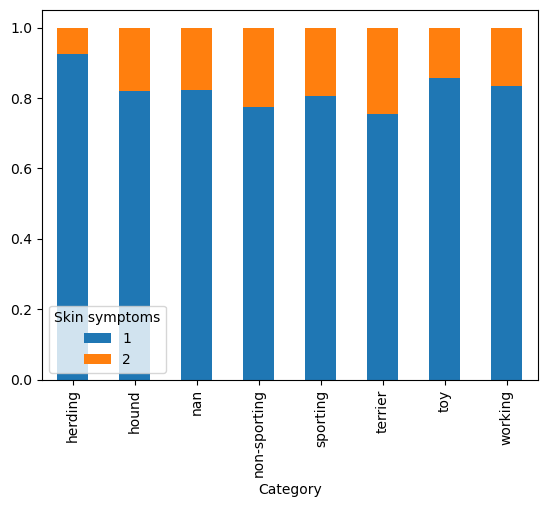

In [32]:
#Visual representation  
(pd.crosstab(df['Category'],df['Skin symptoms'], 
             normalize='index')
   .plot.bar(stacked=True))
plt.show()

Herding has the least skin conditions at only 14% recorded. Toy and Working stay right below 29% followed by Hound. 
Terrier and non-sporting have the highest cases at over 35% each. Terrier with the highest from all categories at 39.3%

### Counts of Category, Classification and Skin symptoms based on dog's age. 

In [33]:
meanprop = {"marker":"o", "markerfacecolor":"white",  "markeredgecolor":"blue", "markersize":"6"}

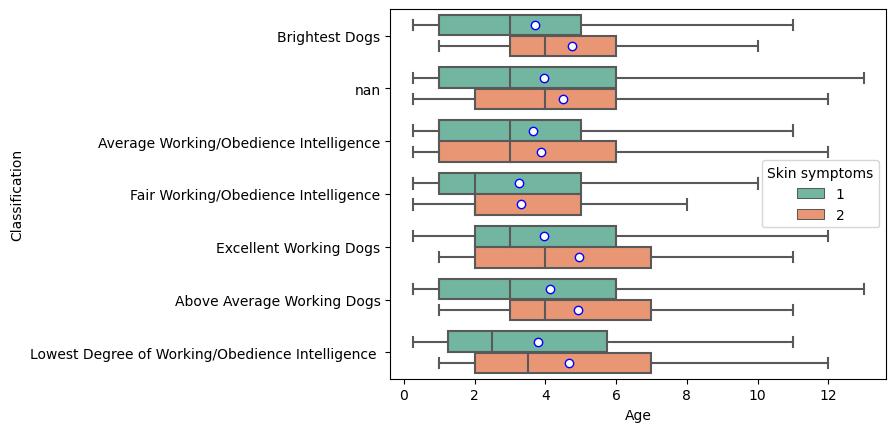

In [34]:
sns.boxplot(x='Age' , y='Classification', hue='Skin symptoms', showmeans=True, showfliers=False, palette="Set2", data=df, meanprops= meanprop)
plt.show()

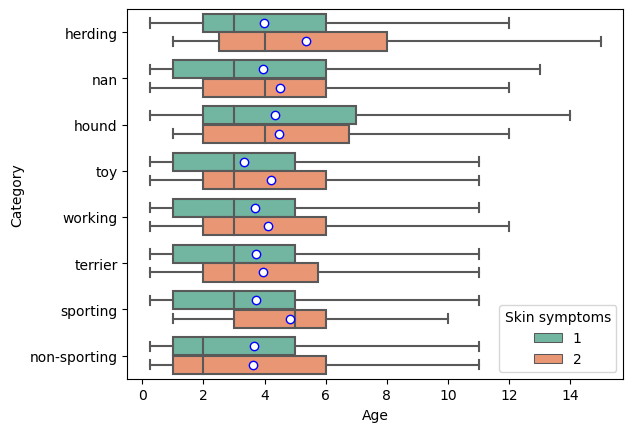

In [35]:
sns.boxplot(x='Age' , y='Category', hue='Skin symptoms', showmeans=True, showfliers=False, data=df, palette="Set2", meanprops= meanprop)
plt.show()

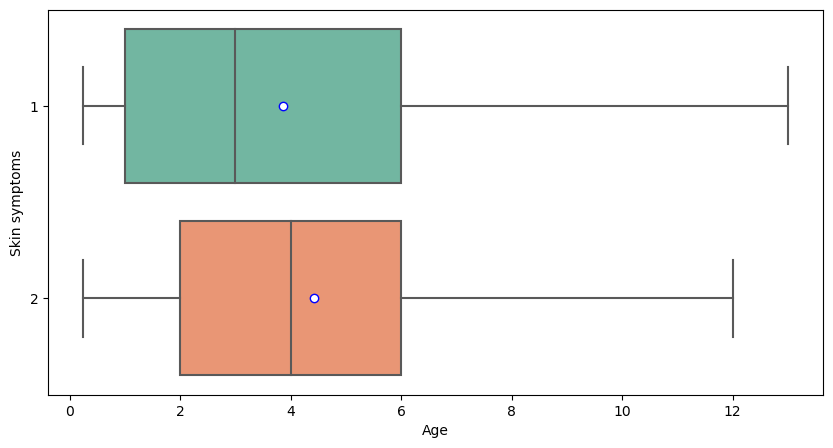

In [36]:
fig = plt.figure(figsize = (10,5))
sns.boxplot(x='Age' , y='Skin symptoms', showmeans=True, showfliers=False, data=df, palette="Set2", orient='h', meanprops= meanprop)
plt.show()

Dogs with skin symptoms seem to always fall within an older range of dogs within their category or classification. This could be due to more environmental exposure and time to develop or show symptoms. Also, the mean for pretty much every category/classification falls above the median for both negative and positive skin symptoms diagnosis.

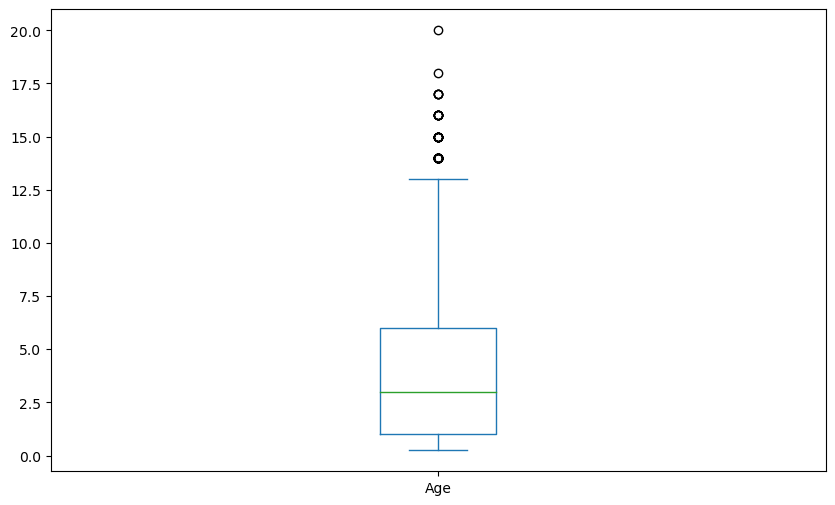

In [37]:
df['Age'].plot.box(figsize=(10,6))
plt.show()

In [38]:
correlation_mat = df.corr()

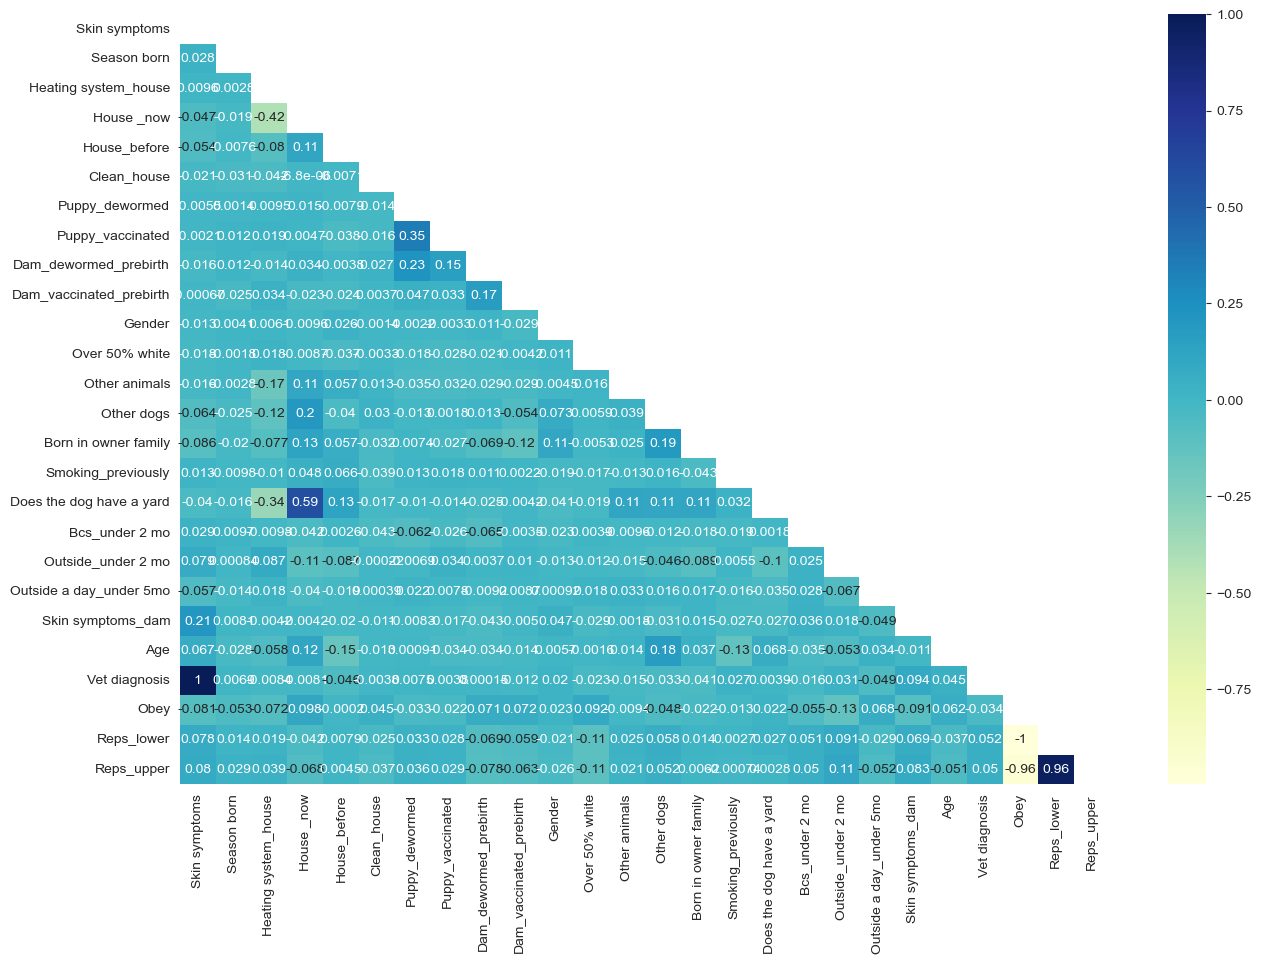

In [39]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(correlation_mat,
mask=mask,cmap="YlGnBu", annot=True)
    plt.show()

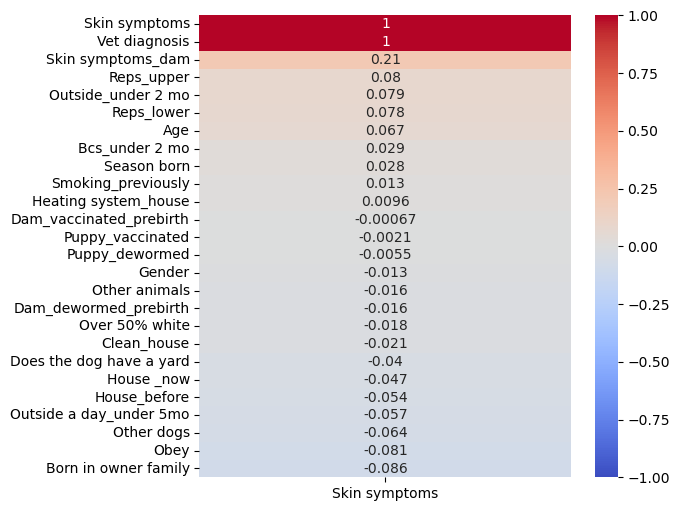

In [40]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_mat[['Skin symptoms']].sort_values(by=['Skin symptoms'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()

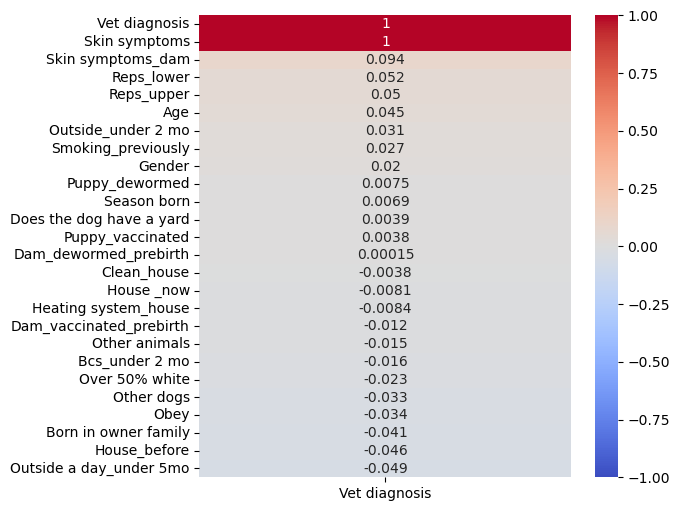

In [41]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_mat[['Vet diagnosis']].sort_values(by=['Vet diagnosis'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()

In [42]:
df[['Age', 'Reps_lower', 'Reps_upper', 'Obey', 'Height_high_inches', 'Height_low_inches', 'Weight_high_lbs', 'Weight_low_lbs']].describe(include='all')

,Age,Reps_lower,Reps_upper,Obey,Height_high_inches,Height_low_inches,Weight_high_lbs,Weight_low_lbs
count,5201.000000,2478.000000,2478.000000,2375.000000,2478,2478,2478,2478
unique,NaN,NaN,NaN,NaN,26,25,41,43
top,NaN,NaN,NaN,NaN,24,21,80,55
freq,NaN,NaN,NaN,NaN,388,416,246,324
mean,3.962892,19.325262,32.151735,67.585263,NaN,NaN,NaN,NaN
std,3.148606,18.195878,26.287324,22.003929,NaN,NaN,NaN,NaN
min,0.250000,1.000000,4.000000,30.000000,NaN,NaN,NaN,NaN
25%,1.000000,5.000000,15.000000,50.000000,NaN,NaN,NaN,NaN
50%,3.000000,16.000000,25.000000,70.000000,NaN,NaN,NaN,NaN
75%,6.000000,26.000000,40.000000,85.000000,NaN,NaN,NaN,NaN


In [43]:
#average higher and lower values on a separate df for visibility
df2 = df[df['Obey']>0]

In [44]:
df2['Reps'] = 0.5*(df2['Reps_lower'] + df2['Reps_upper'])
df2 = df2[df2['Height_low_inches']!='na']
df2['Height_inches'] = 0.5*(df2['Height_low_inches'].astype(float) + df2['Height_high_inches'].astype(float))
df2['Weight_lbs'] = 0.5*(df2['Weight_low_lbs'].astype(float) + df2['Weight_high_lbs'].astype(float))
# group height and weight into larger bins
df2['Height_inches'] = df2['Height_inches'].apply(lambda x: 5*round(1/5*x))
df2['Weight_lbs'] = df2['Weight_lbs'].apply(lambda x: 20*round(1/20*x))

/var/folders/2z/frb2n0xx0xbfzmbmnjvfppjh0000gn/T/ipykernel_11296/4090076117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Reps'] = 0.5*(df2['Reps_lower'] + df2['Reps_upper'])


In [45]:
cols2drop = ['Reps_lower', 'Reps_upper', 
             'Height_low_inches', 'Height_high_inches',
             'Weight_low_lbs', 'Weight_high_lbs']
df2 = df2.drop(cols2drop, axis=1)

In [46]:
df2[['Age', 'Reps', 'Height_inches', 'Obey', 'Weight_lbs']].describe(include='all')

,Age,Reps,Height_inches,Obey,Weight_lbs
count,2323.00000,2349.000000,2349.000000,2349.000000,2349.000000
mean,3.86526,22.818433,19.548744,67.779906,53.154534
std,2.99539,17.867143,5.641236,22.047042,33.482718
min,0.25000,2.500000,10.000000,30.000000,0.000000
25%,1.00000,2.500000,15.000000,50.000000,20.000000
50%,3.00000,20.500000,20.000000,70.000000,60.000000
75%,6.00000,33.000000,25.000000,95.000000,60.000000
max,16.00000,60.500000,30.000000,95.000000,160.000000


This adjustment allows us to see more clearly the weight of the values. Given the similarities in the descriptive data between dfs using the mean for null values can maintain the overall impact of each feature. 

In [47]:
#Drop smoking column as it does not present or show any significant correlation with target variable and it has over 50% missing values. 
df = df.drop(['Smoking_previously'], axis=1)

In [48]:
df.shape

(5265, 32)

In [49]:
df['Breed_En'].value_counts().head(30)

multiracial                       699
German shepherd                   392
Labrador Retriever                199
Rottweiler                        150
Finnish Lapphund                  136
Golden Retriever                  125
Staffordshire Bull Terrier        100
Border Collie                      97
Shetland sheepdog                  95
hovawart                           89
Jack Russell Terrier               85
Lapponian Herder                   78
Bernese Mountain Dog               77
novascotiannoutaja                 71
Cavalier King Charles Spaniel      70
Belgian Sheepdog                   66
Dobermann                          65
Boxer                              65
Australian Shepherd                62
Great Dane                         62
Samoyed                            51
Spanish Water Dog                  50
English Cocker Spaniel             49
collie, shorthair.                 47
French Bulldog                     46
Cairn Terrier                      44
Chinese Cres

In [50]:
#Evaluating most common breed with over 100 records each.
Common_breeds = df[df['Breed_En'].isin(['multiracial', 'German shepherd', 'Labrador Retriever', 'Rottweiler',  'Finnish Lapphund', 'Golden Retriever', 'Staffordshire Bull Terrier'])]
Common_breeds['Breed_En'].value_counts()

multiracial                   699
German shepherd               392
Labrador Retriever            199
Rottweiler                    150
Finnish Lapphund              136
Golden Retriever              125
Staffordshire Bull Terrier    100
Name: Breed_En, dtype: int64

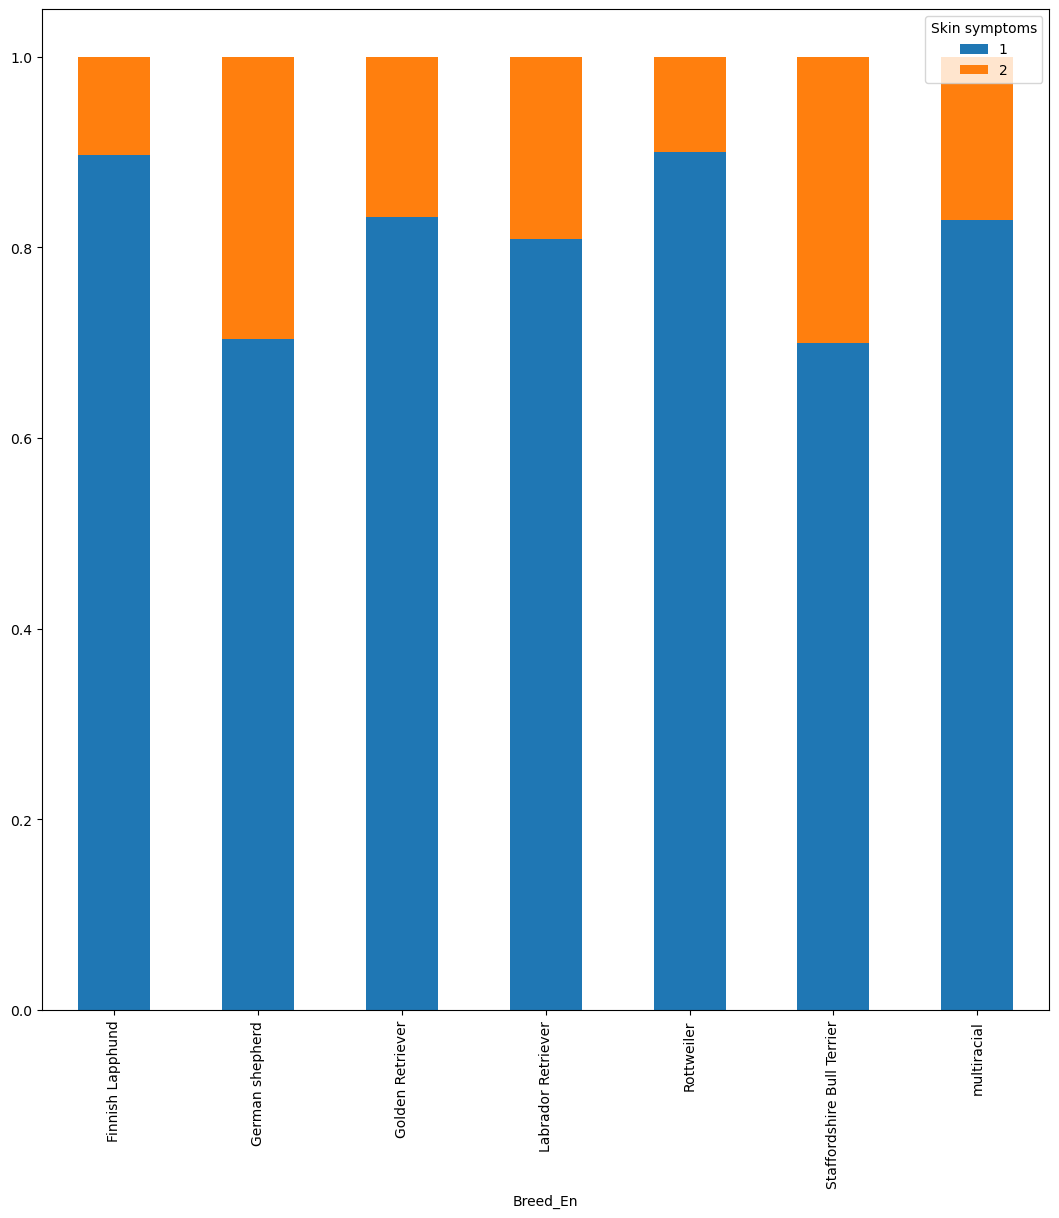

In [51]:
(pd.crosstab(Common_breeds['Breed_En'],Common_breeds['Skin symptoms'], 
             normalize='index').plot.bar(stacked=True, figsize=(13, 13)))
plt.show()

In [52]:
#Evaluating mid common breeds with 51-99 records each.
Mid_breeds = df[df['Breed_En'].isin(['Border Collie', 'Shetland sheepdog', 'Jack Russell Terrier', 'Lapponian Herder',  'Finnish Lapphund', 'Bernese Mountain Dog', 'Cavalier King Charles Spaniel', 'Belgian Sheepdog', 'Dobermann', 'Boxer', 'Australian Shepherd', 'Great Dane', 'Samoyed'])]
Mid_breeds['Breed_En'].value_counts()

Finnish Lapphund                 136
Border Collie                     97
Shetland sheepdog                 95
Jack Russell Terrier              85
Lapponian Herder                  78
Bernese Mountain Dog              77
Cavalier King Charles Spaniel     70
Belgian Sheepdog                  66
Boxer                             65
Dobermann                         65
Australian Shepherd               62
Great Dane                        62
Samoyed                           51
Name: Breed_En, dtype: int64

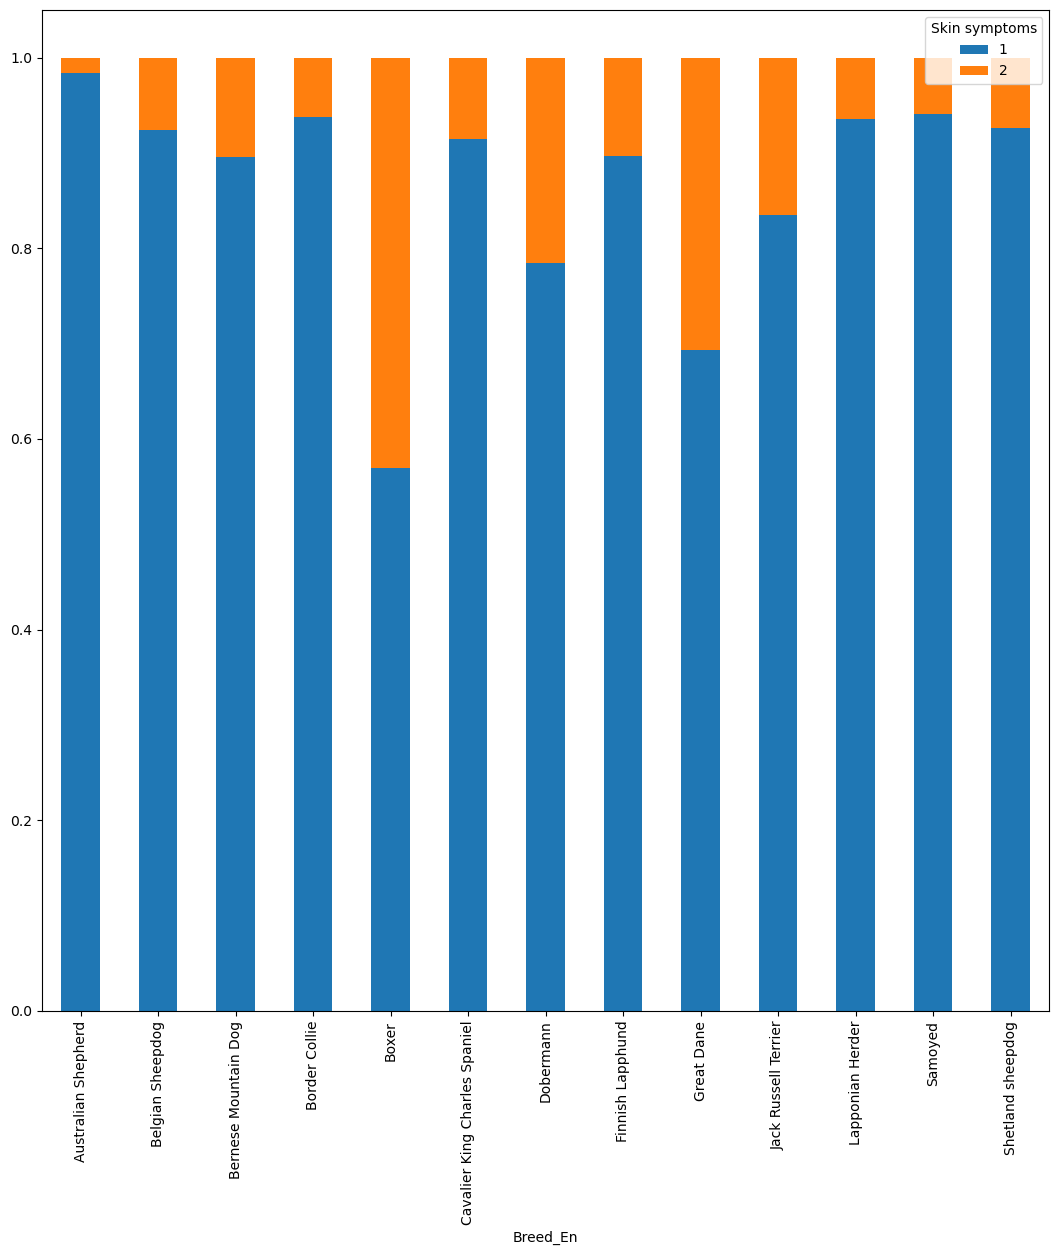

In [53]:
(pd.crosstab(Mid_breeds['Breed_En'],Mid_breeds['Skin symptoms'], 
             normalize='index').plot.bar(stacked=True, figsize=(13, 13)))
plt.show()

In [54]:
#Evaluating low common breeds with less than 50 records each.
Low_breeds = df[df['Breed_En'].isin(['Spanish Water Dog', 'English Cocker Spaniel', 'collie, shorthair.', 'French Bulldog',  'Cairn Terrier', 'Chinese Crested', 'Parson russellin terrieri', 'Siberian Husky'])]
Low_breeds['Breed_En'].value_counts()

Spanish Water Dog            50
English Cocker Spaniel       49
collie, shorthair.           47
French Bulldog               46
Cairn Terrier                44
Parson russellin terrieri    42
Chinese Crested              42
Siberian Husky               41
Name: Breed_En, dtype: int64

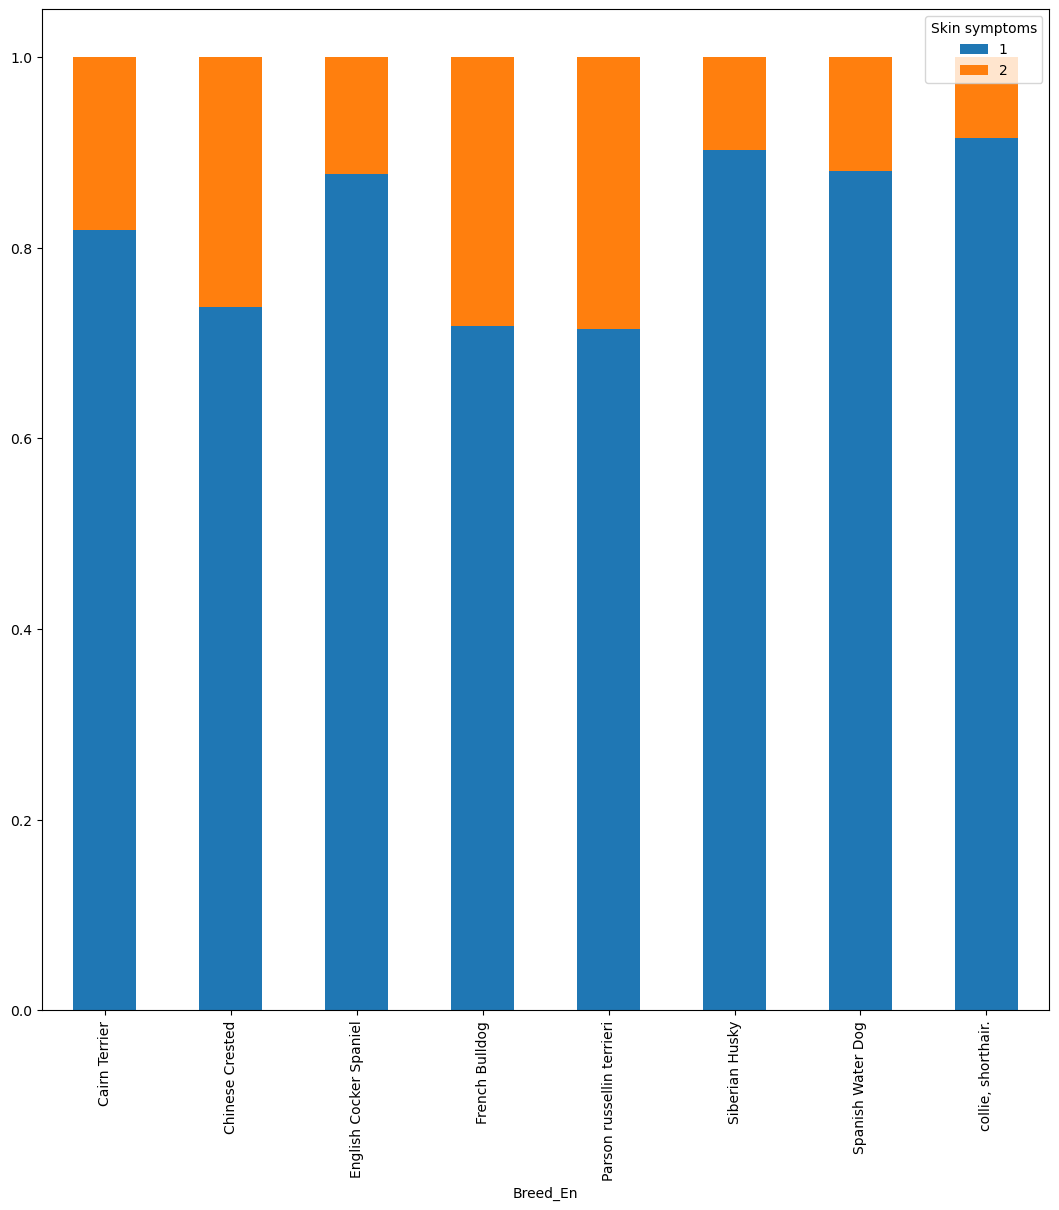

In [55]:
(pd.crosstab(Low_breeds['Breed_En'],Low_breeds['Skin symptoms'], 
             normalize='index').plot.bar(stacked=True, figsize=(13, 13)))
plt.show()

### Summary 

While exploring possible relations between skin symptoms on a pup given the prebirth conditions or skin symptoms of the pup’s mom we found the following: 
- We can see in the graph that almost 3x the number of puppies of dams with skin symptoms also present skin symptoms. This could mean the condition can be hereditary.
- There does not seem to be a significant impact on the puppy's skin symptoms if the dam is dewormed before birth. There is only a roughly 4% decrease in cases.
- The percentage of puppy's skin condition are virtually equal regardless of the dam's vaccination prebirth.

Other details of the data include: 
- The average age of the dogs in the study is 3.96 years. There is no information about the dog’s life span, therefore, we can infer that the average is reasonable due to vet visits being more frequent in the early/mid years of the dog’s life. The age range in the data goes from 3 months of age up to 20 years old. **A dogs average life span varies on breed but average is within 9-12 years of life for most breeds.** 
- Most dogs in the dataset are considered of “working” followed by “sporting” with the least categories being “toy” and “non-sporting”. 
- Most dogs are also in the Average Working/Obedience classification followed by Brightest dogs. 
- A somewhat even distribution in gender with about 55% female and 45% male 
 
Correlations based on characteristics and environment of the dog: 
- Puppy being dewormed or vaccinated does not seem to show any relation to them representing skin symptoms. likewise, being over 50% white or the puppy's gender also do not seem to be related. 
- Checking on the two features that show some variability we find that:
Skin condition based on the puppy's BCS (body condition score) remains steady within the first 4 but has a 25.7% increase when the puppy has a 5 BCS which refers to "Very Slim". 
Skin condition based on being born in the owner's family show that when the pup is not born in owner's family, they show an 18.7% more cases of skin condition than if they are born in the family.
- Herding has the least skin conditions at only 14% recorded. Toy and Working stay right below 29% followed by Hound. 
- Terrier and non-sporting have the highest cases at over 35% each. Terrier with the highest from all categories at 39.3%
- Dogs with skin symptoms seem to always fall within an older range of dogs within their category or classification. This could be due to more environmental exposure and time to develop or show symptoms. Also, the mean for pretty much every category/classification falls above the median for both negative and positive skin symptoms diagnosis.

Correlations based on breed of the dog: 
- German Shepperd, Staffordshire Bull Terrier, Boxer, Doberman, Great Dane, Chinese Crested, French Bulldog, and Parson Russellian Terrier all present over 20-25% cases of skin symptoms.
- The Boxer has over 40% of records with skin symptoms. 

Checking for any direct correlation with either skin symptom or vet diagnosis we found that skin symptoms on the dam have the highest correlation with both. For skin symptoms it is followed by outside time under 2 months at 0.11.

Additionally, we adjusted the reps, heigh and weight columns to provide the higher and lower average thus allowing for a thorough description of the data. Lastly, the smoking previously column was dropped as after EDA there was no significant data to show that it has any impact ton skin symptom variable and it had over 50% missing values.

In [56]:
#Save updated df 
df.to_csv('../Data/df_updated.csv')